## Introducción a diferencias finitas
### Juan S. Hincapié - Carlos Duque-Daza


### Esquemas espaciales

$$
\begin{aligned}
& \text{FFD:} \frac{du}{dx} \approx \frac{u_{i+1}-u_{i}}{\Delta x} +  O(\Delta x) \\
& \text{BFD:}    \frac{du}{dx} \approx \frac{u_{i}-u_{i-1}}{\Delta x} +  O(\Delta x) \\
& \text{CFD:} \frac{du}{dx} \approx \frac{u_{i+1}-u_{i-1}}{2\Delta x} +  O(\Delta x)^2 
\end{aligned}
$$


### Esquemas temporales

<div align='justify'> Los esquemas anteriores sirven para aproximar derivadas espaciales. ¿Qué hacemos con las derivadas temporales? Debemos seguir usando Euler en sus diferentes versiones:</div>

Tenindo la siguiente EDP:
$$
\frac{du}{dt} = \phi (t,x,u)
$$

Esquema explícito (Euler hacia adelante):
$$
    \frac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t} = \phi_i^{n} (t,x,u)
$$

Esquema implícito (Euler hacia atrás):
$$
    \frac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t} = \phi_i^{n+1} (t,x,u)
$$

### Esquema implícito ¿Cómo se programa?

<div align='justify'> Para entender la lógica de programación de los esquemas temporales implícitos, vamos a recurrir a nuestra ecuación de onda:</div>


$$
    \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x}  = 0
$$

Las condiciones de frontera:
* $u(t,0) = 0$ y  $u(t,2) = 0$

Condiciones iniciales:
* $u = 2$ para $0.5 \leq x \leq 1.0$ y $u = 0$ en el resto del dominio

Vamos a usar un esquema espacial hacia atrás, y un esquema temporal implícito (como ya se había dicho):

$$
    \frac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t} = -c \frac{u^{n+1}_{i}-u^{n+1}_{i-1}}{\Delta x}
$$

Todo lo desconocido lo dejamos al lado izquierdo de la ecuación, mientras que lo conocido lo dejaremos al lado derecho. Además, por abreviar notación, $\beta = \frac{c\Delta t}{\Delta x}$

$$
    -\beta u^{n+1}_{i-1} + u^{n+1}_{i} + \beta u^{n+1}_{i} = u^{n}_{i}
$$

Nuestro dominio espacial 1D tiene 6 nodos:

<div align='center'> 0--------1--------2--------3--------4--------5--------6</div><br>

<div align='justify'>Empezamos resolviendo las ecuaciones desde el nodo 1, dado que el valor de la velocidad en el nodo 0 ya se conoce por la condición de Dirichlet. </div>

\begin{align*}
    & i=1 \rightarrow -\beta u^{n+1}_{0} + u^{n+1}_{1} + \beta u^{n+1}_{1} = u^{n}_{1}\\
    & i=2 \rightarrow -\beta u^{n+1}_{1} + u^{n+1}_{2} + \beta u^{n+1}_{2} = u^{n}_{2} \\
    & \vdots \\
    & i=5 \rightarrow -\beta u^{n+1}_{4} + u^{n+1}_{5} + \beta u^{n+1}_{5} = u^{n}_{5}
\end{align*}


<div align='justify'>¿Cómo podemos representar este sistema de ecuaciones de manera matricial? Lo primero es factorizar el factor común: </div>

\begin{align*}
    & i=1 \rightarrow -\beta u^{n+1}_{0} + (1+\beta)u^{n+1}_{1} = u^{n}_{1}\\
    & i=2 \rightarrow -\beta u^{n+1}_{1} + (1+\beta)u^{n+1}_{2} = u^{n}_{2} \\
    & \vdots \\
    & i=6 \rightarrow -\beta u^{n+1}_{4} + (1+\beta)u^{n+1}_{5} = u^{n}_{5}
\end{align*}

Posteriormente pasamos a la derecha las velocidades que conocemos por las condiciones del tipo Dirichlet. Para este caso en particula, sólo pasamos a la derecha el término $\beta u^{n+1}_{0}$:
\begin{align*}
    & i=1 \rightarrow (1+\beta)u^{n+1}_{1} = u^{n}_{1}  + \beta u^{n+1}_{0}\\
    & i=2 \rightarrow -\beta u^{n+1}_{1} + (1+\beta)u^{n+1}_{2} = u^{n}_{2} \\
    & \vdots \\
    & i=6 \rightarrow -\beta u^{n+1}_{4} + (1+\beta)u^{n+1}_{5} = u^{n}_{5}
\end{align*}


<div align='justify'>Luego, montamos nuestra matriz de coefieciente, que va a estar multiplicada por el vector de incógnitas del sistema e igualada al vector de velocidad del presente:</div>

$$
\left[\begin{array}{ccccccc}
(1+\beta) & 0 & 0 & 0 & 0   \\
-\beta & (1+\beta) & 0 & 0 & 0   \\
0 & -\beta & (1+\beta) & 0 & 0   \\
0 & 0 & -\beta & (1+\beta) & 0   \\
0 & 0 & 0 & -\beta & (1+\beta)   \\
\end{array}\right]\cdot
\left[\begin{array}{c}
u_{1}\\
u_{2}\\
u_{3}\\
u_{4}\\
u_{5}
\end{array}\right] ^{n+1} = 
\left[\begin{array}{c}
u^n_{1}+\beta u^{n+1}_{0}\\
u^n_{2}\\
u^n_{3}\\
u^n_{4}\\
u^n_{5}
\end{array}\right]
$$

<div align='justify'>¿Qué se debe hacer para resolver este sistema de ecuaciones?</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

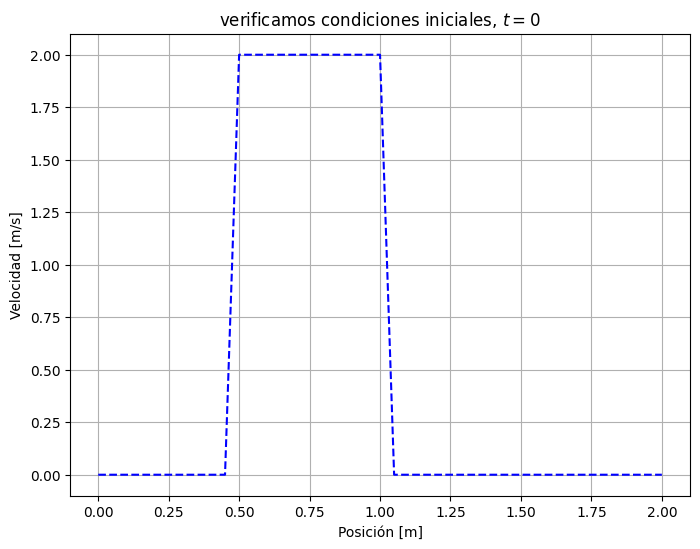

In [2]:
# Paso 00: discretizar el dominio espacial

# Paso 01: discretizar el dominio temporal

# Paso 02: asumir velocidad de la onda

# Paso 03: crear vector de velocidad almacenar
# el valor de la velocidad en cada punto discreto

# Paso 04: incluimos condiciones inciales


# Paso 05: verificar condiciones iniciales


<div align='justify'>Antes de continuar con nuestro programa, es preciso respondernos la pregunta ¿Y cómo automatizo el llenado de la matriz de coeficientes? ¿Hay algún patrón para llenar la diagonal principal? ¿Hay algún patrón para llenar la diagonal que está a la izquierda de la diagonal principal?</div>

In [3]:
# Paso 06: hacemos un vector de velocidad para almacenar el futuro

# Paso 08: creamos una matriz para almacenar los coeficientes

# Paso 09: llenamos la matriz

# Paso 09: resolvemos todo el problema
 

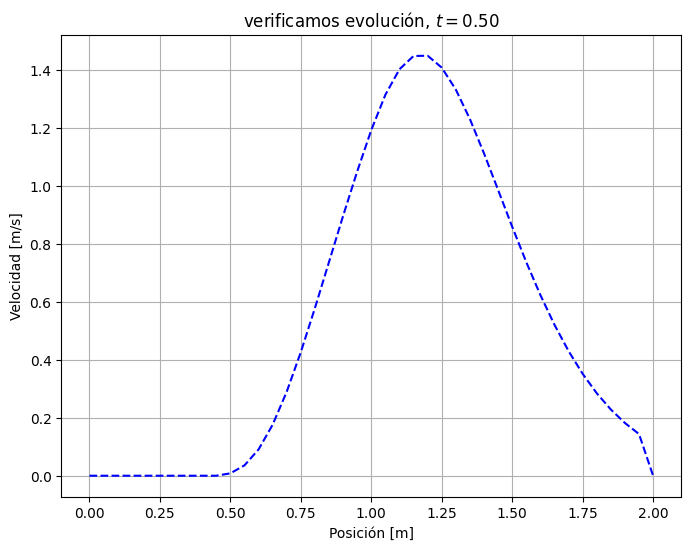

In [4]:
# Paso 09: plotear
plt.figure(2, figsize=(8,6))
plt.plot(x, uf, "--b")
plt.title("verificamos evolución, $t={:.2f}$".format(t[-1]))
plt.xlabel("Posición [m]")
plt.ylabel("Velocidad [m/s]")
plt.grid()
plt.show()

### Actividad
* ¿Podría poner el solucionador en una función? Así queda más fácil y se pueden hacer experimentos numéricos
* ¿Qué ocurre si $dt=0.1$ y $dx=0.05$? ¿Qué número de Courant nos da? ¿Se vuelve inestable?
* Resuelva el problema anterior usando esquema espacial centrado ¿Cómo queda nuestra matriz de coeficientes?
* Ahora intentelo usando un esquema espacial hacia adelante

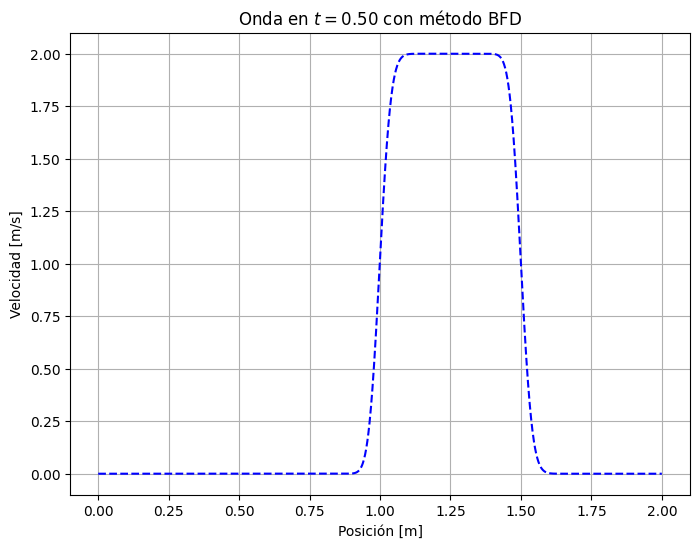

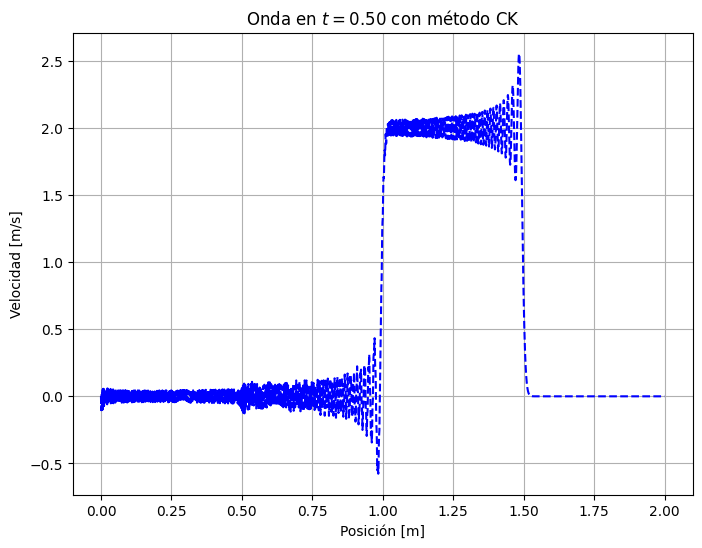

In [5]:
def solAdevection(x, dx, t, dt, beta, fig, metodo = "BFD"):

    return uf

def graficador(x,uf,t, metodo, fig):



x0 = 0; xf = 2; dx = 0.06
x = np.arange(x0, xf+dx, dx)
t0 = 0; tf = 0.5; dt = 0.05
t = np.arange(t0, tf+dt, dt)
beta = c*dt/dx
metodo = "BFD"
fig = 2

uf = solAdevection(x, dx, t, dt, beta, fig, metodo)
